# Simple Linear Regression
<br>

### Building  Linear Regression Model using sklearn
<br>
We need to perform the following steps -
<br><br>
1. Load the Dataset<br>
2. Analyze the Data<br>
3. Data Preparation -
    <ul><li>Normalisation or Strandardization</li>
    <li>Split into train-test</li></ul><br>
4. Traing the Model<br>
5. Errors or Residual Analysis on training data<br>
6. Prediction<br>
7. Evaluation

### 1. Load the dataset

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('student_scores.csv')
df.shape

(25, 2)

In [58]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### 2. Analyzing the data using basic Statistics

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [60]:
# Statistical description of the data

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [61]:
# Checking for Missing value

df.isnull().any()

# df.isnull().sum()

Hours     False
Scores    False
dtype: bool

In [62]:
# Checking for any Duplicate row

df.duplicated().any()

# df.duplicated().sum()

False

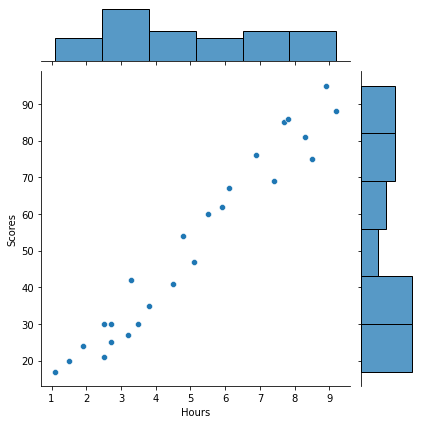

In [63]:
# Visualizing the data

sns.jointplot(x='Hours' , y='Scores' , data=df , kind='scatter')

<p style='font-size:15px'><b>Here, 'Hours' --> Independent feature/variable (input)   &   'Scores' --> Dependent feature (target)<br>
A Linear Relationship is clearly visible among them.</b></p>
<br>

<AxesSubplot:xlabel='Scores'>

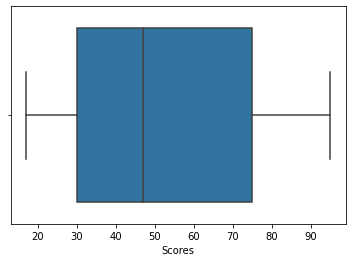

In [64]:
# Checking for any outlier present or not in the 'TARGET' varible

# Using 'boxplot', to detect outliers

sns.boxplot(df['Scores'])

<p style='font-size:16px'><b>Hence, no outliers are present in this data.</b></p><br><br>

In [65]:
# Correlation Matrix b/w input & target variable

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

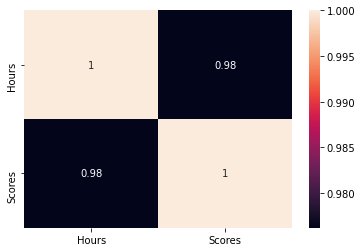

In [66]:
sns.heatmap(df.corr(), annot=True)

<br>

### 3. Data Preparation
<br>
<b>a.</b> Rescaling the features(Normalisation / Standardization)<br>
<b>b.</b> Split into train and test data

#### a. Normalization / Standardization

In [67]:
from sklearn.preprocessing import MinMaxScaler

rescale = MinMaxScaler()
features = ['Hours','Scores']

norm_data = rescale.fit_transform(df.loc[:,features])

print(norm_data.shape, type(norm_data))

(25, 2) <class 'numpy.ndarray'>


In [68]:
df = pd.DataFrame(norm_data, columns=features)
df.head()

,Hours,Scores
0,0.172840,0.051282
1,0.493827,0.384615
2,0.259259,0.128205
3,0.913580,0.743590
4,0.296296,0.166667


In [69]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,0.482963,0.442051
std,0.311740,0.324191
min,0.000000,0.000000
25%,0.197531,0.166667
50%,0.456790,0.384615
75%,0.777778,0.743590
max,1.000000,1.000000


#### b. Split the data into train-test

In [70]:
from sklearn.model_selection import train_test_split

df_train , df_test = train_test_split(df, test_size=0.2, random_state=0)

print(df_train.shape)
print(df_test.shape)

(20, 2)
(5, 2)


In [71]:
df_train.head()

,Hours,Scores
22,0.333333,0.230769
17,0.098765,0.089744
24,0.827160,0.884615
23,0.716049,0.756410
14,0.000000,0.000000


<br>

### 4. Train the data

In [72]:
X_train = df_train[['Hours']]
y_train = df_train['Scores']

In [73]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [74]:
print('Slope (m) :', reg.coef_)
print('y intercept (c) :', reg.intercept_)

Slope (m) : [1.02918356]
y intercept (c) : -0.05230920294690855


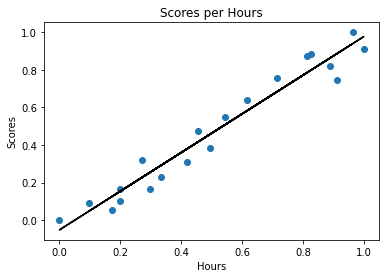

In [75]:
# Visualization by fitting the line : y = m x + c

plt.scatter(X_train, y_train)

plt.plot(X_train, 1.02918356 * X_train + -0.05230920294690855, 'black')

plt.title('Scores per Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.show()

<br>

### 5. Errors / Residual Analysis on Training data
<b>a. Distribution of the Errors or Residuals</b> - Normal Distribution with 0 mean ~ N(0, sigma^2)<br>
<b>b. Check for the patterns in Residuals</b> - There should be no patterns / They should be independent of each other<br>
<b>c. Homoscedasticity (Constant Variance)</b> - The variance of residual is the same for any value of X</p>

In [76]:
# Predict on train data

y_train_pred = reg.predict(X_train)

<AxesSubplot:xlabel='Scores', ylabel='Density'>

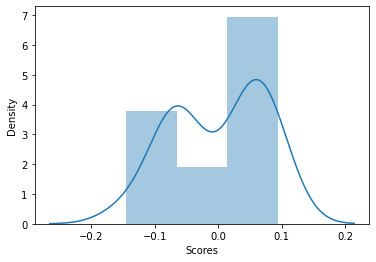

In [77]:
# a. Distribution of the Errors or Residuals

residuals = y_train - y_train_pred

sns.distplot(residuals)

<p style='font-size:16px'>The training data should follow the Normal Distribution with mean 0, <br><b>It has the mean at 0 but does not follow Normal Distribution in this case, as our training data is very small. </b></p>
<br><br>

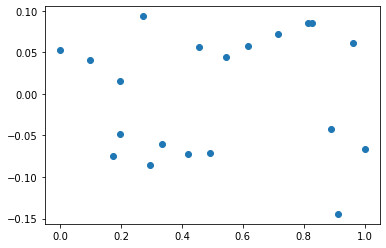

In [78]:
# b. Residuals should be independent of each other
# c. Residuals should follow Homoscedasticity (Constant Variance)

plt.scatter(X_train, residuals)
plt.show()

<p style='font-size:16px'><b>The Residuals are Independent of each other but it does not follow the Homoscedascity that much.</b></p>
<br><br>

### 6. Prediction with the Test data

In [79]:
df_test.head()

,Hours,Scores
5,0.049383,0.038462
2,0.259259,0.128205
19,0.777778,0.666667
16,0.172840,0.166667
11,0.592593,0.576923


In [80]:
X_test = df_test[['Hours']]    # input variable
y_test = df_test['Scores']     # target variable

In [81]:
# Predict on the test data

y_test_pred = reg.predict(X_test)

In [82]:
# Actual score vs Predicted score

df = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': y_test_pred})
df

,Actual Scores,Predicted Scores
5,0.038462,-0.001485
2,0.128205,0.214516
19,0.666667,0.748167
16,0.166667,0.125574
11,0.576923,0.557577


<br>

### 7. Evaluating the Algorithm

In [83]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.05363922947439714
Mean Squared Error:  0.0035500935744933264
Root Mean Squared Error:  0.05958266169359444


In [84]:
print('Accuracy :', round(metrics.r2_score(y_test, y_test_pred), 3))

Accuracy : 0.945
